Exploring the Impact of Age, Price, and Sex on Shoe Size

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('exploring_dataset.csv')

In [4]:
df = pd.DataFrame(df)

In [5]:
df.head()

,age,shoe_size,price(£),sex
0,3,27,4,m
1,4,27,4,m
2,5,28,5,m
3,6,29,5,f
4,7,29,6,f


In [6]:
df.describe()

,age,shoe_size,price(£)
count,1000.000000,1000.00000,1000.000000
mean,9.532000,30.70700,7.427000
std,3.484985,2.35174,3.361841
min,3.000000,27.00000,3.000000
25%,7.000000,29.00000,5.000000
50%,10.000000,31.00000,6.000000
75%,12.000000,32.00000,9.000000
max,16.000000,36.00000,15.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1000 non-null   int64 
 1   shoe_size  1000 non-null   int64 
 2   price(£)   1000 non-null   int64 
 3   sex        1000 non-null   object
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


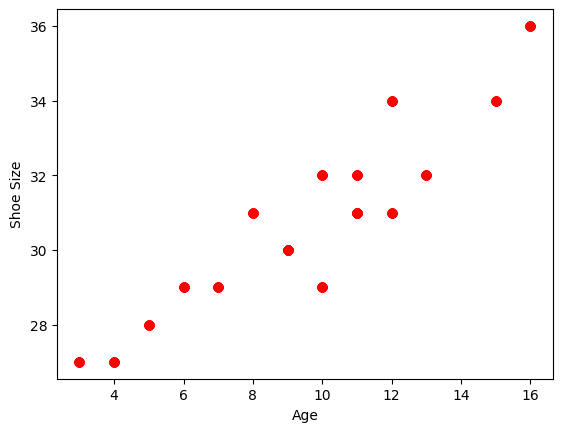

In [9]:
plt.scatter(df.age, df.shoe_size, color='red')
plt.xlabel('Age')
plt.ylabel('Shoe Size')
plt.savefig('images/age_vs_shoe_size.png')

Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

X = df.iloc[:, [0]].values
y = df.shoe_size.values.reshape(-1, 1)

linear_reg.fit(X, y)

LinearRegression()

In [12]:
b0 = linear_reg.intercept_
print("b0 : ", b0)

b0 :  [24.7858227]


In [13]:
b1 = linear_reg.coef_
print("b1 : ", b1)

b1 :  [[0.62118939]]


In [14]:
y_pred = linear_reg.predict(X)

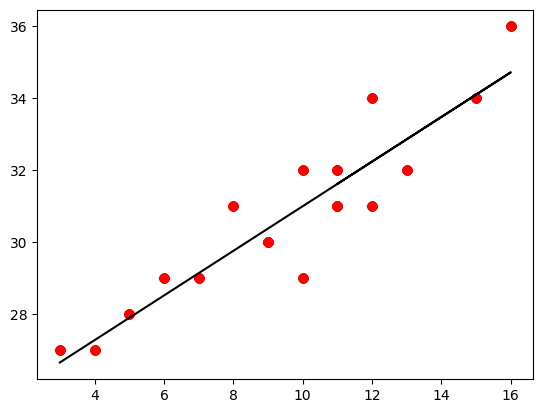

In [15]:
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, color='black')
plt.savefig('images/simple_linear_regression.png')

In [16]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(linear_reg, X, y, cv=5, scoring='neg_mean_squared_error')

print("Cross Validation MSE Scores : ", -cv_score)
print("Average MSE : ", -cv_score.mean())

Cross Validation MSE Scores :  [0.83787294 0.8381454  0.84474926 0.83831707 0.85760414]
Average MSE :  0.8433377605414032


In [17]:
residuals = y - y_pred

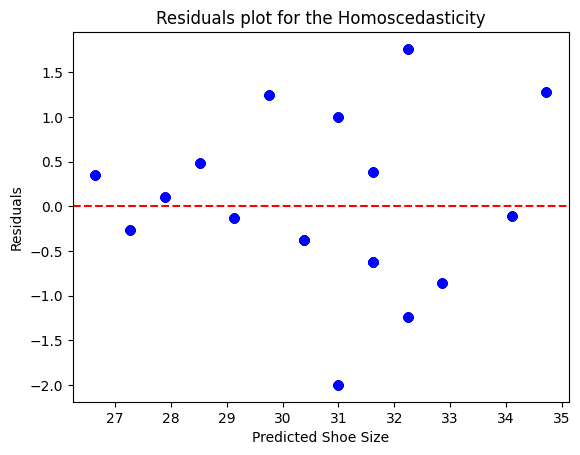

In [18]:
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y = 0, color='red', linestyle='--')
plt.title('Residuals plot for the Homoscedasticity')
plt.xlabel('Predicted Shoe Size')
plt.ylabel('Residuals')
plt.savefig('images/residuals_plot.png')

As per the plot, the residuals are randomly scattered around the 0 and do not form any clear pattern, thus the assumption of homoscedasticity holds.

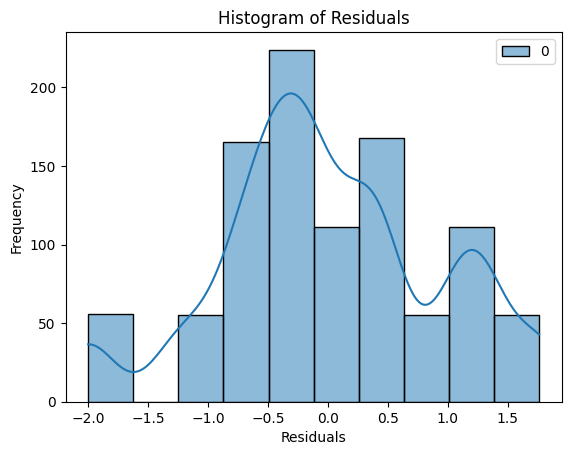

In [19]:
import seaborn as sns

sns.histplot(residuals, kde=True, color='blue', bins=10)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig('images/residuals_histogram.png')

It has nearly achived the normal distribution around the 0 (not the perfect one).

In [ ]:
import scipy.stats as stats
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Q-Q plot for the Residuals')

Linear Regression Model Using the Gradient Descent

Bias :  [9.02228417e-10]
Weight :  [0.92052508]


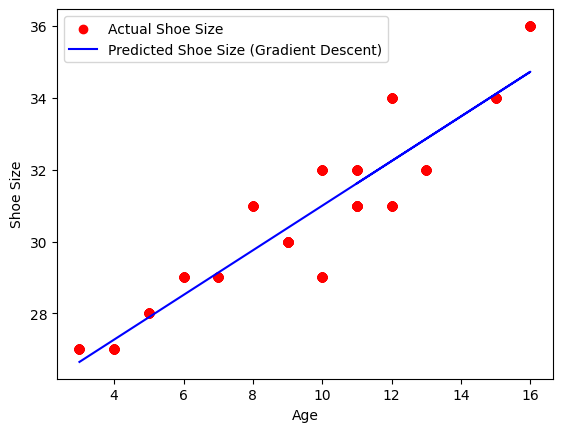

In [21]:
X = df.age.values.reshape(-1, 1)
y = df.shoe_size.values.reshape(-1, 1)

X_normalised = ((X - X.mean()) / X.std()).reshape(-1, 1)
y_normalised = ((y - y.mean()) / y.std()).reshape(-1, 1)

theta = np.random.randn(2, 1)

alpha = 0.01
iterations = 1000

m = len(X_normalised)

X_b = np.c_[np.ones((m, 1)), X_normalised]

for iteration in range(iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y_normalised)
    theta = theta - alpha * gradients

bias = theta[0]
weight = theta[1]

print("Bias : ", bias)
print("Weight : ", weight)

y_pred = X_b.dot(theta)

y_pred_rescaled = y_pred * y.std() + y.mean()

plt.scatter(X, y, color='red', label='Actual Shoe Size')
plt.plot(X, y_pred_rescaled, color='blue', label='Predicted Shoe Size (Gradient Descent)')
plt.xlabel('Age')
plt.ylabel('Shoe Size')
plt.legend()
plt.savefig('images/gradient_descent_predictions.png')

Multiple Linear Regression Model

In [22]:
df.head()

,age,shoe_size,price(£),sex
0,3,27,4,m
1,4,27,4,m
2,5,28,5,m
3,6,29,5,f
4,7,29,6,f


In [23]:
df_encoded = pd.get_dummies(df, columns=['sex'], drop_first=True)

X_multi = df_encoded[['age', 'price(£)', 'sex_m']]
y = df_encoded['shoe_size']

In [24]:
multi_linear_model = LinearRegression()
multi_linear_model.fit(X_multi, y)

LinearRegression()

In [25]:
print("Coefficients : ", multi_linear_model.coef_)
print("Intercept : ", multi_linear_model.intercept_)

Coefficients :  [ 0.67083133 -0.06071165  0.34068881]
Intercept :  24.574118271605258


In [26]:
y_pred = multi_linear_model.predict(X_multi)

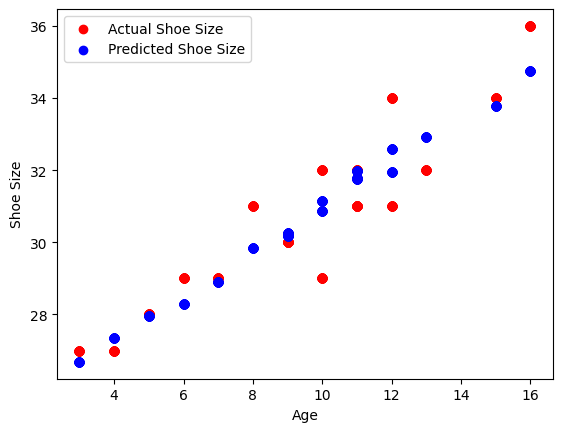

In [27]:
plt.scatter(df_encoded['age'], y, color='red', label='Actual Shoe Size')
plt.scatter(df_encoded['age'], y_pred, color='blue', label='Predicted Shoe Size')
plt.xlabel('Age')
plt.ylabel('Shoe Size')
plt.legend()
plt.savefig('images/multiple_linear_regression.png')

In [28]:
cv_score = cross_val_score(multi_linear_model, X_multi, y, cv=5, scoring='neg_mean_squared_error')

print("Cross Validation MSE Scores : ", -cv_score)
print("Average MSE : ", -cv_score.mean())

Cross Validation MSE Scores :  [0.79856282 0.79993639 0.80406066 0.79792372 0.82037013]
Average MSE :  0.8041707453514322


The averahe MSE has decrease in the Multi linear Regression Model

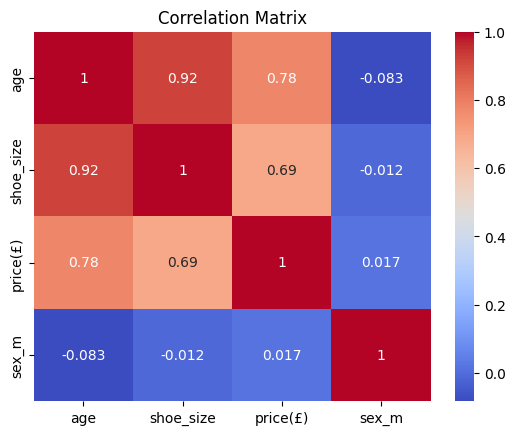

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_multi_vif = X_multi.apply(pd.to_numeric, errors='coerce').dropna()

corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('images/correlation_matrix.png')

In [31]:
vif = pd.DataFrame()
vif['Variaeble'] = X_multi_vif.columns

X_multi_vif = X_multi_vif.astype(float)
vif['VIF'] = [variance_inflation_factor(X_multi_vif.values, i) for i in range(X_multi_vif.shape[1])]

print(vif)

  Variaeble        VIF
0       age  15.102363
1  price(£)  15.207312
2     sex_m   1.902158


The age and price seems correlated variables.

Applying the Regularization 

In [32]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_multi, y)

print("Coefficents : ", ridge_model.coef_)
print("Intercept : ", ridge_model.intercept_)

cv_score = cross_val_score(ridge_model, X_multi, y, cv=5, scoring='neg_mean_squared_error')

print("Cross Validation MSE Scores : ", -cv_score)
print("Average MSE : ", -cv_score.mean())

Coefficents :  [ 0.67081095 -0.06069428  0.34053699]
Intercept :  24.574267901785557
Cross Validation MSE Scores :  [0.79856321 0.79993563 0.80406176 0.79792474 0.82036837]
Average MSE :  0.8041707429094928


In [33]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_multi, y)

print("Coefficents : ", lasso_model.coef_)
print("Intercept : ", lasso_model.intercept_)

cv_score = cross_val_score(lasso_model, X_multi, y, cv=5, scoring='neg_mean_squared_error')

print("Cross Validation MSE Scores : ", -cv_score)
print("Average MSE : ", -cv_score.mean())

Coefficents :  [ 0.62100154 -0.01076953  0.        ]
Intercept :  24.867598588264766
Cross Validation MSE Scores :  [0.83444827 0.83455516 0.84122399 0.83498437 0.85417165]
Average MSE :  0.8398766873038237


Polynomial Regression Model for the non-linearity

In [34]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_reg = PolynomialFeatures(degree=(2, 10))

X_age = pd.DataFrame(df['age'])

X_poly = polynomial_reg.fit_transform(X_age)

In [35]:
X_poly

array([[1.00000000e+00, 9.00000000e+00, 2.70000000e+01, ...,
        6.56100000e+03, 1.96830000e+04, 5.90490000e+04],
       [1.00000000e+00, 1.60000000e+01, 6.40000000e+01, ...,
        6.55360000e+04, 2.62144000e+05, 1.04857600e+06],
       [1.00000000e+00, 2.50000000e+01, 1.25000000e+02, ...,
        3.90625000e+05, 1.95312500e+06, 9.76562500e+06],
       ...,
       [1.00000000e+00, 8.10000000e+01, 7.29000000e+02, ...,
        4.30467210e+07, 3.87420489e+08, 3.48678440e+09],
       [1.00000000e+00, 1.00000000e+02, 1.00000000e+03, ...,
        1.00000000e+08, 1.00000000e+09, 1.00000000e+10],
       [1.00000000e+00, 1.21000000e+02, 1.33100000e+03, ...,
        2.14358881e+08, 2.35794769e+09, 2.59374246e+10]], shape=(1000, 10))

In [36]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y)

LinearRegression()

In [37]:
x_range = np.linspace(min(X_age.values), max(X_age.values), 100).reshape(-1, 1)

In [38]:
x_range_tra = polynomial_reg.transform(x_range)

/home/prashikbhimte/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [39]:
y_pred = poly_reg_model.predict(x_range_tra)

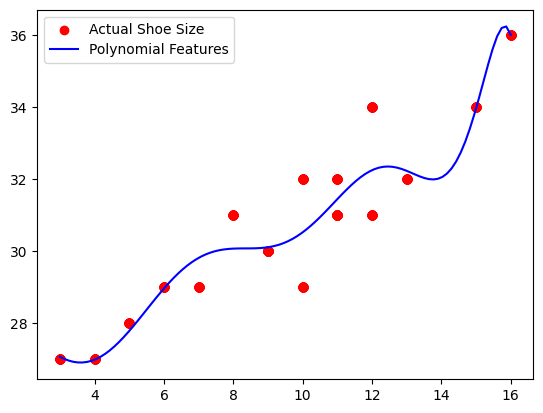

In [ ]:
plt.scatter(X_age, y, color='red', label='Actual Shoe Size')
plt.plot(x_range, y_pred, color='blue', label='Polynomial Features')
plt.legend()
plt.savefig('images/polynomial_features.png')

In [41]:
cv_score = cross_val_score(poly_reg_model, X_multi, y, cv=5, scoring='neg_mean_squared_error')

print("Cross Validation MSE Scores : ", -cv_score)
print("Average MSE : ", -cv_score.mean())

Cross Validation MSE Scores :  [0.79856282 0.79993639 0.80406066 0.79792372 0.82037013]
Average MSE :  0.8041707453514322
